<div style="line-height:0.45">
<h1 style="color:#0793B2  "> Huber Regressor  </h1>
</div>

Robust regression algorithm less sensitive to outliers.      
Huber Regressor optimizes the squared and absolute loss for the samples where $ \left| \frac{y - X^{\prime}w}{\sigma} \right| < \epsilon $

where $\sigma$ $\epsilon$ are the parameters to be optimized.

In [1]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression, Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
ranstate = np.random.RandomState(0)

X, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)

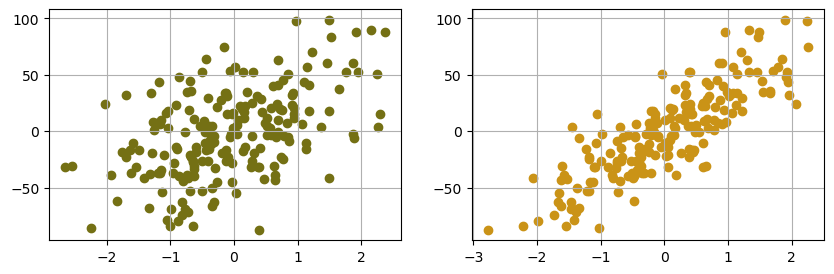

In [3]:
# Plot data
col_left = '#747014'
col_right = '#CA9317'
fix, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(X[:,0], y, c=col_left)
ax[0].grid(True)
ax[1].scatter(X[:,1], y, c=col_right)
ax[1].grid(True)
plt.show()

In [4]:
X[:4] = ranstate.uniform(10, 20, (4, 2))
y[:4] = ranstate.uniform(100, 200, 4)

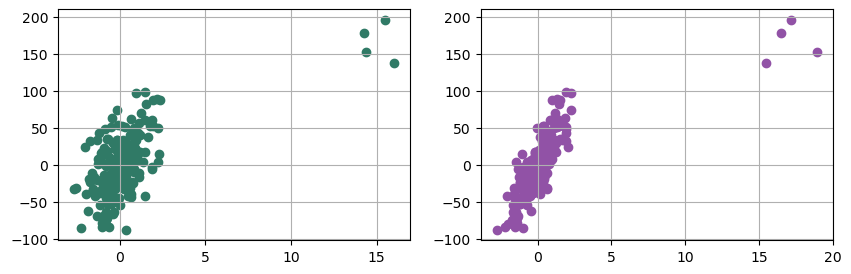

In [5]:
## Plot outliers
col_left = '#307A66'
col_right = '#9152A6'
fix, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].scatter(X[:,0], y, c=col_left)
ax[0].grid(True)
ax[1].scatter(X[:,1], y, c=col_right)
ax[1].grid(True)
plt.show()

In [6]:
""" Std Linear Regressor """
linear = LinearRegression()
linear.fit(X, y);

In [7]:
""" Std Ridge Regressor """
ridge_regressor = Ridge(alpha=0.1)
ridge_regressor.fit(X, y)

Ridge(alpha=0.1)

In [8]:
""" Huber Regressor """
huber = HuberRegressor()
# Train
huber.fit(X,y);

In [9]:
"""" Reshape to 2D array.
The -1 indicates that NumPy should infer the size of that dimension based on the length of the original array,     
to ensure that the resulting array has the correct shape for the predict method.
"""
X[1].reshape(1, -1)

array([[16.02763376, 15.44883183]])

In [10]:
### Predict with huber model
one_y_pred_huber = huber.predict(X[1].reshape(1, -1))
y_pred_huber = huber.predict(X)
y_pred_huber

array([806.71987246, 763.50484115, 762.96442431, 841.69173926,
        -4.64825106,  -8.351572  , -27.56676275,  16.59714663,
       -24.29242447,   1.22090566, -40.07091148, -24.37549762,
        15.99863576, -66.41425936,  60.6066851 ,  -8.2776007 ,
       -72.55196655, -30.98990515,  -1.19010646,  27.46033876,
        19.10093935,  79.40667954, -17.7124982 , -36.39198804,
        46.94517413, -34.70671495, -15.245985  , -37.63763407,
        19.40131994,  14.67623392, -68.71497091, -40.45894492,
        -5.13940503,  -9.94865248, -66.21532984,   2.18020331,
        38.68691886,  33.27613514, -23.36743496,  10.18117308,
        32.12168635,   3.65379502,  38.57933614,   4.4680993 ,
        48.88979013, -57.13112346, -58.18693718, -26.52359895,
       -26.16539775, -63.40553965,  39.16838181,  30.02061838,
         2.02142185,  30.24898545,   1.10702475,  38.55262637,
         7.40094957, -30.23363938, -12.31414557, -16.35181452,
       -81.11499407,   6.52186216, -41.34855509,  84.55

In [11]:
## Predict with linear regressor
y_pred = linear.predict(X)
y_pred

array([ 2.27609632e+02,  2.08833396e+02,  2.17064980e+02,  2.45986234e+02,
       -6.23489147e-02, -9.74143135e+00, -1.47545217e+01,  1.18572948e-01,
       -1.51781645e+01, -3.39251787e+00, -1.97802766e+01, -8.68887023e+00,
        6.79619764e+00, -2.27741686e+01,  1.14418315e+01, -3.49761887e+00,
       -1.91683539e+01, -8.72545303e+00, -6.68308454e+00,  1.39364213e+01,
        4.18291744e+00,  1.82440613e+01, -5.91658123e+00, -1.24217893e+01,
        1.44256986e+01, -1.01683935e+01, -3.98813300e+00, -1.64882116e+01,
        6.01806346e+00, -2.57033991e+00, -2.45194808e+01, -1.64723360e+01,
       -4.17360847e+00,  1.18377883e+00, -2.11263497e+01, -8.13976897e+00,
        1.75259515e+01,  8.98784599e+00, -8.91191420e+00,  1.77810528e+00,
        1.01751562e+01,  7.20822826e-01,  1.51821953e+01, -3.17947940e+00,
        1.78838449e+01, -2.23323980e+01, -2.29382384e+01, -1.38183906e+01,
       -5.10720438e+00, -2.14161789e+01,  7.00380084e+00,  1.06442297e+01,
        3.09693358e+00,  

In [12]:
## Predict with L2 regressor
y_pred_ridge = ridge_regressor.predict(X)
y_pred_ridge

array([ 2.27599999e+02,  2.08828881e+02,  2.17054504e+02,  2.45970195e+02,
       -6.47342394e-02, -9.73763500e+00, -1.47508233e+01,  1.20111597e-01,
       -1.51735399e+01, -3.39141370e+00, -1.97753869e+01, -8.68887963e+00,
        6.79286999e+00, -2.27721734e+01,  1.14437071e+01, -3.49825182e+00,
       -1.91700957e+01, -8.72669815e+00, -6.68009856e+00,  1.39301988e+01,
        4.18204132e+00,  1.82446824e+01, -5.91729250e+00, -1.24214344e+01,
        1.44228447e+01, -1.01693208e+01, -3.98974615e+00, -1.64852004e+01,
        6.01593866e+00, -2.56725413e+00, -2.45166825e+01, -1.64698743e+01,
       -4.17316171e+00,  1.17949561e+00, -2.11254893e+01, -8.13510343e+00,
        1.75193160e+01,  8.98625448e+00, -8.91157258e+00,  1.77723903e+00,
        1.01724995e+01,  7.19463839e-01,  1.51772073e+01, -3.17790741e+00,
        1.78789010e+01, -2.23289464e+01, -2.29345570e+01, -1.38151594e+01,
       -5.11010411e+00, -2.14145762e+01,  7.00474526e+00,  1.06408385e+01,
        3.09357225e+00,  

In [13]:
len(y), len(y_pred_huber)

(200, 200)

In [14]:
print("True coefficients:", coef)
print("Huber coefficients:", huber.coef_)
print("Linear Regression coefficients:", linear.coef_)

True coefficients: [20.4923687  34.16981149]
Huber coefficients: [17.79064226 31.01065329]
Linear Regression coefficients: [ 1.97461433 11.65050932]


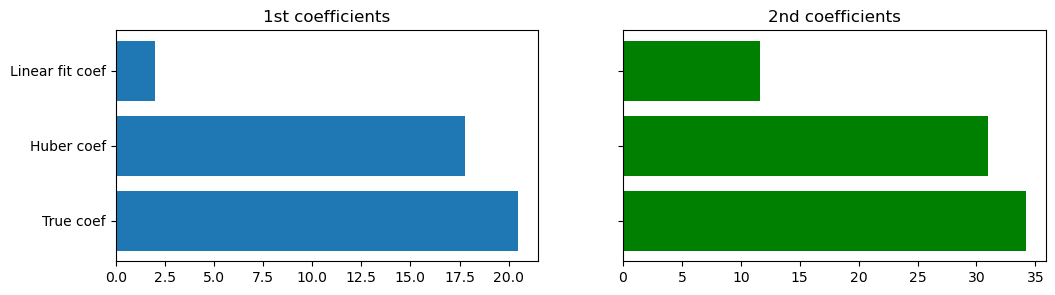

In [15]:
##### Plot comparison 
fix, ax = plt.subplots(1,2,figsize=(12,3),sharey=True)
ax[0].barh(['True coef','Huber coef', 'Linear fit coef'], width=[coef[0],huber.coef_[0], linear.coef_[0]])
ax[0].set_title("1st coefficients",fontsize=12)
ax[1].barh(['True coef','Huber coef', 'Linear fit coef'], color='g', width=[coef[1], huber.coef_[1], linear.coef_[1]])
ax[1].set_title("2nd coefficients",fontsize=12)
plt.show()

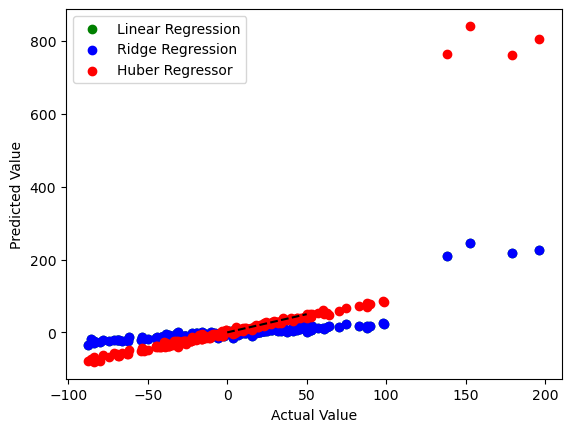

In [16]:
# Plot the actual values and predictions
plt.scatter(y, y_pred, color='green', label='Linear Regression')
plt.scatter(y, y_pred_ridge, color='blue', label='Ridge Regression')
plt.scatter(y, y_pred_huber, color='red', label='Huber Regressor')
plt.plot([0, 50], [0, 50], 'k--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()